<a href="https://colab.research.google.com/github/sambhajizambre/Assignments/blob/main/ML_24_Unsupervised_Learning_algorithms_(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning algorithms

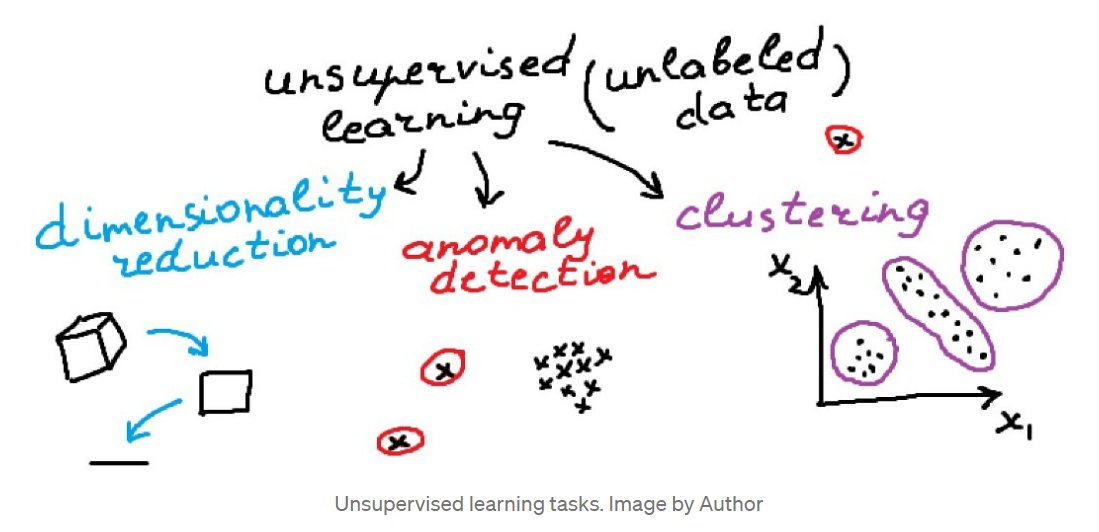

# Implementing PCA in Python
There is much more to PCA beyond the premise of this article. The only way to truly appreciate the beauty of PCA is to experience it yourself. Hence, I would love to share some code snippets here for anyone that wants to get their hands dirty. The full code can be accessed here with Google Colab.

First things first, let’s get the imports out of the way and generate some data that we will be working with.

In [1]:
# Generic
import pandas as pd
import numpy as np

# Generate data sets
from sklearn.datasets import make_blobs

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Create an array with 3 clusters in 3-dimensions
X, y = make_blobs(n_samples=1000, centers=3, n_features=3, random_state=0, cluster_std=[1,2,3], center_box=(10,65))

# Standardize the data
X = StandardScaler().fit_transform(X)

# Prepare the array in a DataFrame
col_name = ['x' + str(idx) for idx in range(0, X.shape[1])]
df = pd.DataFrame(X, columns=col_name)
df['cluster_label'] = y

df.head()

,x0,x1,x2,cluster_label
0,-0.366353,1.022466,1.166899,2
1,-1.179214,1.318905,1.047407,2
2,0.346441,-1.360488,-0.417740,1
3,0.507115,0.055279,-0.890964,0
4,-0.185192,0.937566,0.930304,2


Our toy data set has 3 variables — x0, x1, and x2 and they are distributed in a way that clumps together in 3 different clusters. The “cluster_label” tells us which cluster the data point belongs to.

In [3]:
# Visualize our data
colors = px.colors.sequential.Plasma
colors[0], colors[1], colors[2] = ['red', 'green', 'blue']
fig = px.scatter_3d(df, x='x0', y='x1', z='x2', color=df['cluster_label'].astype(str), color_discrete_sequence=colors, height=500, width=1000)
fig.update_layout(showlegend=False,
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                    center=dict(x=0, y=0, z=-0.1),
                                    eye=dict(x=1.5, y=-1.4, z=0.5)),
                  margin=dict(l=0, r=0, b=0, t=0),
                  scene=dict(xaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             yaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             zaxis=dict(backgroundcolor='lightgrey',
                                        color='black', 
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10))))
fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))
fig.show()

The data seems ready for PCA. We’re going to try and reduce its dimensionality. Fortunately, Sklearn made PCA very easy to execute. Even though it took us over 2000 words to explain PCA, we only needed 3 lines to run it.



In [4]:
# Perform PCA (w/o limits on n_components)
pca = PCA()
_ = pca.fit_transform(df[col_name])
PC_components = np.arange(pca.n_components_) + 1

There are a couple of moving parts here. When we fit our data to Sklearn’s PCA function, it does all of the heavy liftings to return us a PCA model and the transformed data.

The model gives us access to multitudes of attributes such as eigenvalues, eigenvectors, mean of original data, variance explained, and the list goes on. These are incredibly insightful if we want to understand what the PCA has done with our data.

One attribute I’d like to highlight is the pca.explained_variance_ratio_ which tells us the proportion of variance explained by each principal component. We could visualize this with a Scree Plot.

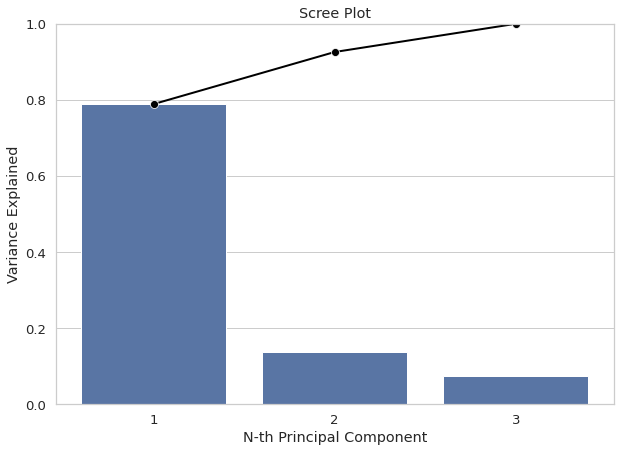

In [5]:
# Scree Plot
_ = sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.barplot(x=PC_components, y=pca.explained_variance_ratio_, color='b')
_ = sns.lineplot(x=PC_components-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

The chart informs us that using 2 principal components instead of 3 is fine because they can capture 90%+ of the variance.

On top of that, we can also look at the combinations of variables that created each principal component with pca.components_**2. We could use a heat map to showcase this.

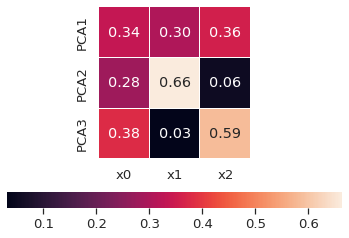

In [6]:
# Feature Weight
_ = sns.heatmap(pca.components_**2,
                 yticklabels=["PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(col_name),
                 annot=True,
                 fmt='.2f',
                 square=True,
                 linewidths=0.05,
                 cbar_kws={"orientation": "horizontal"})

In our example, we can see that PCA1 is made from 34% of x0, 30% of x1, and 36% of x2. PCA2 is primarily dominated by x1.

There are a lot more useful attributes that are made available by Sklearn. For those who are interested, I recommend having a look at the attributes section of PCA on Sklearn documentation.

Now that we understand the principal components a little bit better, we can make a final decision on the number of principal components we want to keep. In this case, I feel that 2 principal components are sufficient.

So, we can re-run the PCA model, but this time with the n_components=2 argument, which tells the PCA to keep only the top 2 principal components for us.

In [7]:
# Perform PCA (Choose n_components to keep)
pca = PCA(n_components=2)
pca_array = pca.fit_transform(df)

# Convert back to DataFrame for readability
df_pca = pd.DataFrame(data=pca_array)
df_pca.columns = ['PC' + str(col+1) for col in df_pca.columns.values]
df_pca['label'] = y

df_pca.head()

,PC1,PC2,label
0,1.750435,-0.041716,2
1,2.255957,-0.226133,2
2,-1.058243,0.998596,1
3,-1.165212,-0.799110,0
4,1.478118,-0.034766,2


This will return us a DataFrame with the first two principal components. Finally, we can plot a scatterplot to visualize our data.

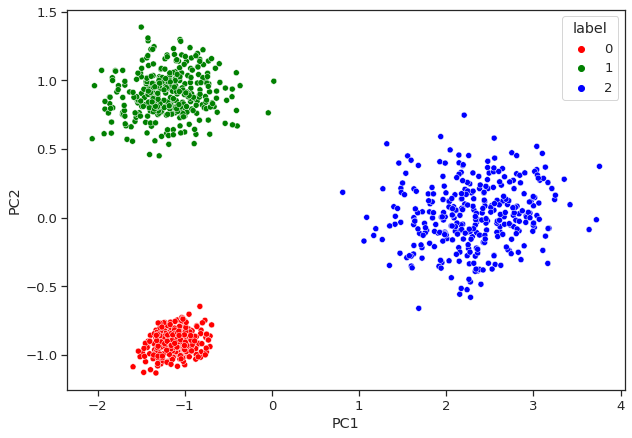

In [8]:
# Plot Principal Component
_ = sns.set(style='ticks', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=df_pca['label'], palette=['red', 'green', 'blue'])


Reference Material:
1. https://towardsdatascience.com/using-principal-component-analysis-pca-for-machine-learning-b6e803f5bf1e